In [75]:
## Casey Douthitt
## 1/2/2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
cookies = pd.read_excel('Cookie_Data.xlsx')
cookies.head()

,Customer ID,Age,Age Group,Postcode,Gender,Favourite Cookie,Cookies bought each week
0,1001,60,60-69,2000,M,Choc chip,1
1,1002,53,50-59,2010,M,Choc chip,1
2,1003,22,20-29,2010,F,Choc chip,2
3,1004,30,30-39,2010,F,Choc chip,6
4,1005,52,50-59,2010,F,Macadamia,3


In [77]:
unique_ages = cookies['Age Group'].unique()
unique_genders = cookies['Gender'].unique()
cookie_purchases = cookies['Cookies bought each week']
favourite_cookies_list = cookies['Favourite Cookie']
unique_cookie_types = cookies['Favourite Cookie'].unique()
genders_list = cookies['Gender']
unique_postcodes = cookies['Postcode'].unique()
postcodes_list = cookies['Postcode']

print(unique_ages)
print(unique_genders)
print(cookie_purchases)

['60-69' '50-59' '20-29' '30-39' '40-49' '10-19']
['M' 'F']
0      1
1      1
2      2
3      6
4      3
5      3
6      8
7      2
8      1
9      3
10     6
11     6
12     6
13     3
14     3
15     2
16     2
17     1
18     4
19     3
20     3
21     3
22     4
23     5
24     9
25     6
26     1
27    10
28    11
29    20
30     1
31     1
32     1
33     1
34     4
35     1
36     1
37     1
38    11
39     2
40     3
41     3
42     3
43     3
44     2
45     7
Name: Cookies bought each week, dtype: int64


In [78]:
import string

demographic_count = {}
demographic_cookie_count = {}
demographics_list = []

for age in unique_ages:
    for gender in unique_genders:
        demo = []
        demo.append(gender)
        demo.append(age)
        demographics_list.append(''.join((demo[0], demo[1])))
            
print(demographics_list)
print(demographic_count)

['M60-69', 'F60-69', 'M50-59', 'F50-59', 'M20-29', 'F20-29', 'M30-39', 'F30-39', 'M40-49', 'F40-49', 'M10-19', 'F10-19']
{}


In [79]:
ages = cookies['Age Group']
genders = cookies['Gender']

all_demos_list = []

for age, gender in zip(ages, genders):
    demo = []
    demo.append(gender)
    demo.append(age)
    all_demos_list.append(''.join((demo[0], demo[1])))

print(all_demos_list)
print(len(all_demos_list))

['M60-69', 'M50-59', 'F20-29', 'F30-39', 'F50-59', 'F20-29', 'F20-29', 'F40-49', 'F40-49', 'M20-29', 'F10-19', 'M30-39', 'M30-39', 'M20-29', 'M50-59', 'F30-39', 'F30-39', 'F40-49', 'F60-69', 'F60-69', 'F30-39', 'M60-69', 'M60-69', 'M50-59', 'F40-49', 'M50-59', 'M30-39', 'F10-19', 'F10-19', 'F10-19', 'F20-29', 'F10-19', 'M10-19', 'F10-19', 'M10-19', 'M10-19', 'M30-39', 'M20-29', 'M20-29', 'F20-29', 'F30-39', 'F20-29', 'F40-49', 'F40-49', 'M10-19', 'F10-19']
46


{'M60-69': 3, 'F60-69': 2, 'M50-59': 4, 'F50-59': 1, 'M20-29': 4, 'F20-29': 6, 'M30-39': 4, 'F30-39': 5, 'M40-49': 0, 'F40-49': 6, 'M10-19': 4, 'F10-19': 7}


<BarContainer object of 12 artists>

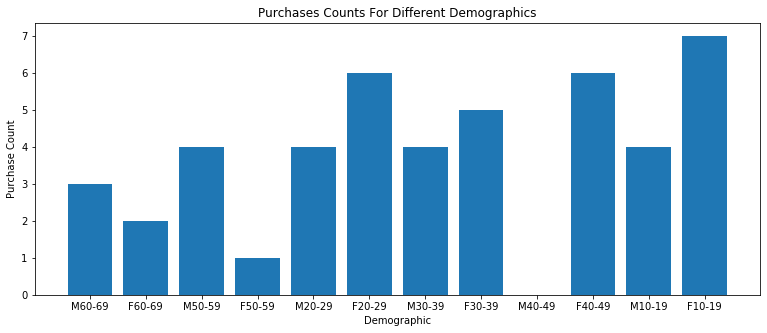

In [80]:
for unique in demographics_list:
    demographic_count[unique] = 0
    for demo in all_demos_list:
        if demo == unique:
            demographic_count[unique] += 1
    
print(demographic_count)

labels, values = zip(*demographic_count.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Purchase Count')
plt.xlabel('Demographic')
plt.title('Purchases Counts For Different Demographics')
plt.bar(labels, values)

{'M60-69': 8, 'F60-69': 7, 'M50-59': 15, 'F50-59': 3, 'M20-29': 18, 'F20-29': 19, 'M30-39': 14, 'F30-39': 16, 'M40-49': 0, 'F40-49': 19, 'M10-19': 8, 'F10-19': 56}


<BarContainer object of 12 artists>

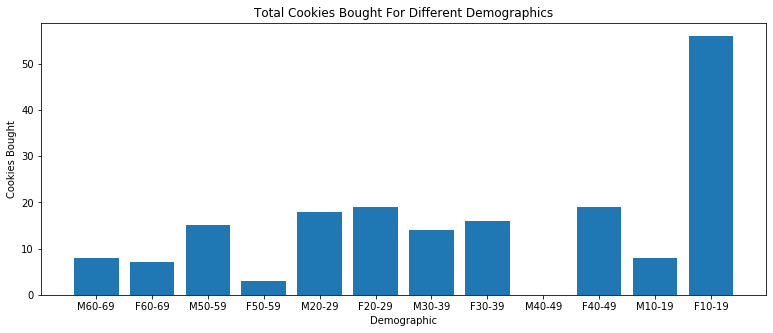

In [68]:
for unique in demographics_list:
    demographic_cookie_count[unique] = 0
    for demo, weekly_cookies in zip(all_demos_list, cookie_purchases):
        if demo == unique:
            demographic_cookie_count[unique] += weekly_cookies
    
print(demographic_cookie_count)

labels, values = zip(*demographic_cookie_count.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Cookies Bought')
plt.xlabel('Demographic')
plt.title('Total Cookies Bought For Different Demographics')
plt.bar(labels, values)

{'Choc chip': 12, 'Macadamia': 16, 'Triple choc': 6, 'Granola': 6, 'Mint': 4, 'Salted caramel': 2}
{'Choc chip': 58, 'Macadamia': 71, 'Triple choc': 14, 'Granola': 27, 'Mint': 11, 'Salted caramel': 2}


<BarContainer object of 6 artists>

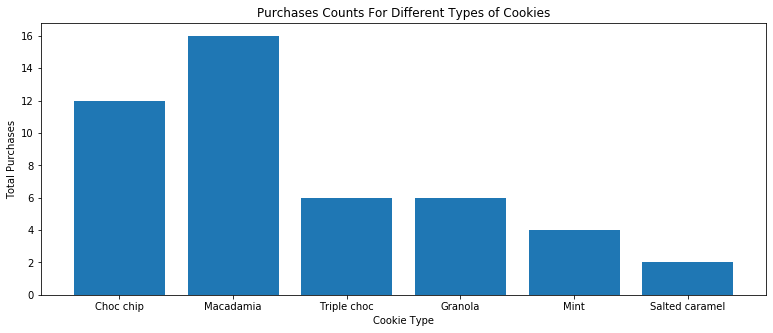

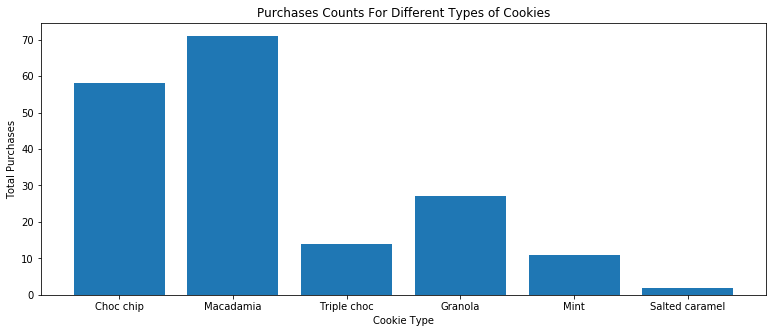

In [81]:

cookie_type_purchase_counts = {}
cookie_type_total_counts = {}

for unique in unique_cookie_types:
    cookie_type_purchase_counts[unique] = 0
    for flavour in favourite_cookies_list:
        if flavour == unique:
            cookie_type_purchase_counts[unique] += 1

print(cookie_type_purchase_counts)

labels, values = zip(*cookie_type_purchase_counts.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Total Purchases')
plt.xlabel('Cookie Type')
plt.title('Purchases Counts For Different Types of Cookies')
plt.bar(labels, values)

for unique in unique_cookie_types:
    cookie_type_total_counts[unique] = 0
    for flavour, cookies in zip(favourite_cookies_list, cookie_purchases):
        if flavour == unique:
            cookie_type_total_counts[unique] += cookies

print(cookie_type_total_counts)

labels, values = zip(*cookie_type_total_counts.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Total Purchases')
plt.xlabel('Cookie Type')
plt.title('Purchases Counts For Different Types of Cookies')
plt.bar(labels, values)

{'M': 19, 'F': 27}
{'M': 63, 'F': 120}


<BarContainer object of 2 artists>

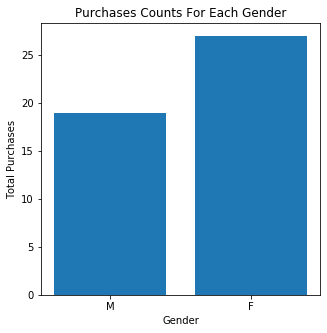

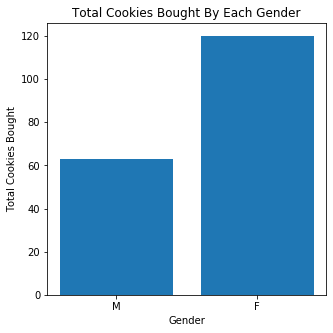

In [82]:
gender_purchase_counts = {}
gender_cookie_counts = {}

for gender in unique_genders:
    gender_purchase_counts[gender] = 0
    for line in genders_list:
        if line == gender:
            gender_purchase_counts[gender] += 1
            
print(gender_purchase_counts)


labels, values = zip(*gender_purchase_counts.items())
plt.figure(figsize=(5,5)) 
plt.ylabel('Total Purchases')
plt.xlabel('Gender')
plt.title('Purchases Counts For Each Gender')
plt.bar(labels, values)


for gender in unique_genders:
    gender_cookie_counts[gender] = 0
    for line, purchase in zip(genders_list, cookie_purchases):
        if line == gender:
            gender_cookie_counts[gender] += purchase
            
print(gender_cookie_counts)

labels, values = zip(*gender_cookie_counts.items())
plt.figure(figsize=(5,5)) 
plt.ylabel('Total Cookies Bought')
plt.xlabel('Gender')
plt.title('Total Cookies Bought By Each Gender')
plt.bar(labels, values)

{'2000': 17, '2010': 5, '2022': 3, '2873': 1, '2321': 3, '2210': 2, '2030': 1, '2763': 1, '2331': 2, '2344': 1, '2093': 2, '2444': 1, '2332': 1, '2333': 1, '2347': 1, '2001': 1, '2211': 1, '2222': 1, '2019': 1}
{'2000': 17, '2010': 5, '2022': 3, '2873': 1, '2321': 3, '2210': 2, '2030': 1, '2763': 1, '2331': 2, '2344': 1, '2093': 2, '2444': 1, '2332': 1, '2333': 1, '2347': 1, '2001': 1, '2211': 1, '2222': 1, '2019': 1}
{'M': 63, 'F': 120}


<BarContainer object of 19 artists>

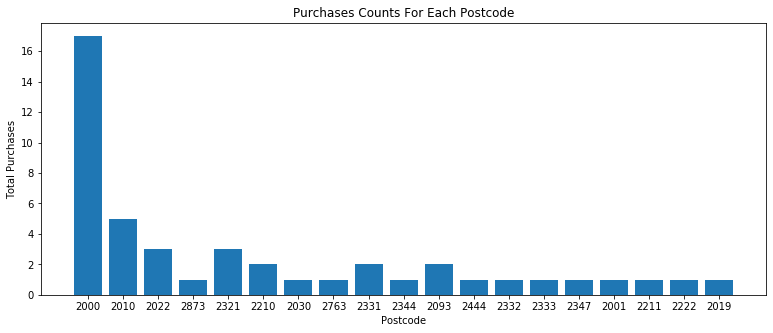

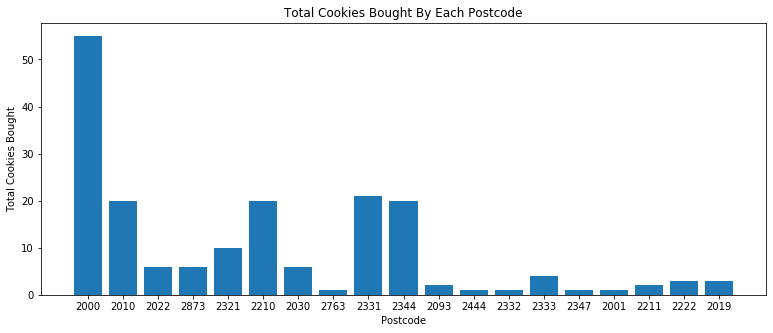

In [88]:
postcode_purchase_counts = {}
postcode_cookie_counts = {}

for postcode in unique_postcodes:
    postcode_purchase_counts[str(postcode)] = 0
    for line in postcodes_list:
        if line == postcode:
            postcode_purchase_counts[str(postcode)] += 1
            
print(postcode_purchase_counts)


labels, values = zip(*postcode_purchase_counts.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Total Purchases')
plt.xlabel('Postcode')
plt.title('Purchases Counts For Each Postcode')
plt.bar(labels, values)


for postcode in unique_postcodes:
    postcode_cookie_counts[str(postcode)] = 0
    for line, purchase in zip(postcodes_list, cookie_purchases):
        if line == postcode:
            postcode_cookie_counts[str(postcode)] += purchase
            
print(postcode_purchase_counts)
            
print(gender_cookie_counts)

labels, values = zip(*postcode_cookie_counts.items())
plt.figure(figsize=(13,5)) 
plt.ylabel('Total Cookies Bought')
plt.xlabel('Postcode')
plt.title('Total Cookies Bought By Each Postcode')
plt.bar(labels, values)